In [25]:
import sklearn.datasets
from sklearn.linear_model import LinearRegression
import numpy as np

In [53]:
diabetes = datasets.load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [58]:
print('Know your dataset:\n {}'.format(diabetes.DESCR))

Know your dataset:
 .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more 

In [12]:
X, y = diabetes.data, diabetes.target
print(X.shape, y.shape)
print('This dataset has 442 entries and 11 features, the features are:\n {}'.format(diabetes.feature_names))

(442, 10) (442,)
This dataset has 442 entries and 11 features, the features are:
 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [28]:
# suppose we only care about bmi which is feature 3
X_bmi = X[:,2].reshape(-1,1) # make sure to reshape the data
print(X_bmi.shape)
print(X_bmi[:5])

(442, 1)
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]


In [29]:
# now we split training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, random_state = 0)
print('Training set size: {}, {}'.format(X_train.shape, y_train.shape))
print('Testing set size: {}, {}'.format(X_test.shape, y_test.shape))

Training set size: (331, 1), (331,)
Testing set size: (111, 1), (111,)


In [48]:
# train the model
lm = LinearRegression()
fit_lm = lm.fit(X_train, y_train)
print('Estimated coefficients: {}'.format(fit_lm.coef_))
print('Estimated intercept: {}'.format(fit_lm.intercept_))
print('So our fitted model is y = 153.22 + 1016.92*x')

Estimated coefficients: [1016.92353894]
Estimated intercept: 153.2256898080062
So our fitted model is y = 153.22 + 1016.92*x


In [59]:
y_predicted = fit_lm.predict(X_test)
print('Check the predictions made by our model:\n {}'.format(y_predicted))

Check the predictions made by our model:
 [259.80811322 214.86996201 162.25944352 129.37786947 199.52522745
 252.13574594 123.89760713 176.50812561 208.2936472  200.62127992
  94.30419048 200.62127992 115.12918738 106.36076763 243.36732619
 130.47392194  93.20813801 100.88050529  67.99893123 194.04496511
 181.98838796 164.45154846 128.281817   212.67785707 209.38969967
 171.02786327 110.74497751 107.4568201  157.87523365 179.79628302
 150.20286637  99.78445282 142.53049909 141.43444662 146.91470897
 174.31602068 137.05023675 143.62655156 154.58707625 187.4686503
  86.6318232  142.53049909 145.8186565  149.1068139  184.18049289
  91.01603307 133.76207934 178.70023055 119.51339725 187.4686503
 130.47392194 105.26471516 172.12391574 144.72260403 197.33312252
 134.85813181 184.18049289 149.1068139  148.01076143 165.54760093
 195.14101758 177.60417808 203.90943733 131.56997441 214.86996201
 181.98838796  89.9199806  201.71733239 196.23707005  78.95945592
 127.18576453 127.18576453 122.80155

In [66]:
print('Training score: {:.2f}'.format(fit_lm.score(X_train,y_train)))
print('Testing score: {:.2f}'.format(fit_lm.score(X_test,y_test)))
print('Since we only considered one feature, with no doubt our model is flawed')

Training score: 0.39
Testing score: 0.16
Since we only considered one feature, with no doubt our model is flawed


In [72]:
from sklearn.metrics import mean_squared_error, r2_score
print('Other measurements:\n MSE: {:.2f} \n R^2: {:.2f} (which is the score)'.format(mean_squared_error(y_test, y_predicted),r2_score(y_test,y_predicted)))

Other measurements:
 MSE: 4181.42 
 R^2: 0.16 (which is the score)


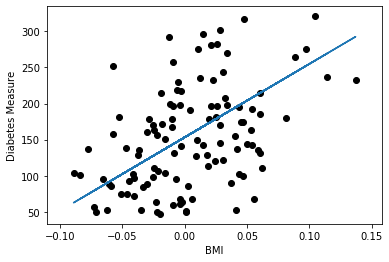

It is obvious our model is not a good fit


In [65]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_predicted)
plt.xlabel('BMI')
plt.ylabel('Diabetes Measure')
plt.show()
print('It is obvious our model is not a good fit')